# Random Forest Classifier

## Initial Downloads 

In [1]:
import pandas as pd #making dataframes
import numpy as np #making arrays
import sklearn as sk #models
import seaborn as sns #plots
import matplotlib.pylab as plt #plots
import matplotlib.pyplot as pyplt #plots
from sklearn import tree #trees
from sklearn.ensemble import RandomForestClassifier #random forest model
from sklearn import metrics #analysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

def get_ds_infos():
    ## 0:Code, 1:Weight, 2:Height, 3:Age, 4:Gender
    dss = np.genfromtxt("data_subjects_info.csv",delimiter=',')
    dss = dss[1:]
    print("----> Data subjects information is imported.")
    return dss #read data subjects CSV file
ds_list = get_ds_infos()

def create_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes):
    dataset_columns = num_features+num_act_labels+num_gen_labels
    ds_list = get_ds_infos() #information about the participants
    train_data = np.zeros((0,dataset_columns)) #making initial array
    test_data = np.zeros((0,dataset_columns))
    for i, sub_id in enumerate(ds_list[:,0]):
        for j, act in enumerate(label_codes):
            for trial in trial_codes[act]:
                fname ='motionsense-dataset/A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1) #drop first column
                unlabel_data = raw_data.values #need to lavel the data for training
                label_data = np.zeros((len(unlabel_data), dataset_columns))
                label_data[:,:-(num_act_labels + num_gen_labels)] = unlabel_data
                label_data[:,label_codes[act]] = 1 #if that activity is included, 1 in column
                label_data[:,-(num_gen_labels)] = int(ds_list[i,4]) #picking the gender column
                ## long trials = training dataset Short trials = test dataset
                if trial > 10: #training data is later trials
                    test_data = np.append(test_data, label_data, axis = 0)
                else:    
                    train_data = np.append(train_data, label_data, axis = 0)
    return train_data , test_data #returns the two datasets - rows of individual results for each time stamp
print("--> Start...")
## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
num_features = 12 # attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
num_act_labels = 6 # dws, ups, wlk, jog, sit, std
num_gen_labels = 1 # 0/1(female/male)
label_codes = {"dws":num_features, "ups":num_features+1, "wlk":num_features+2, "jog":num_features+3, "sit":num_features+4, "std":num_features+5}
trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "sit":[5,13], "std":[6,14]}    
## Use'create_time_series()' to build time-series
print("--> Building Training and Test Datasets...")
train_ts, test_ts = create_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes)
print("--> Shape of Training Time-Seires:", train_ts.shape)
print("--> Shape of Test Time-Series:", test_ts.shape)


----> Data subjects information is imported.
--> Start...
--> Building Training and Test Datasets...
----> Data subjects information is imported.
--> Shape of Training Time-Seires: (1081446, 19)
--> Shape of Test Time-Series: (331419, 19)


## Developing the initial model

In [23]:
TestDF = pd.DataFrame(test_ts) #establishing the data sets as dataframes (Train/test)
TrainDF = pd.DataFrame(train_ts)

features= range(0,18) #all columns except gender
x_test = TestDF[features]
y_test = TestDF [18] #gender column
x_train = TrainDF[features]
y_train = TrainDF[18]

Random_Forest = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=1) #100 chosen as optimum number of estimators
Random_Forest.fit(x_train, y_train) #fitting the model to the training data
Y_Predictions = Random_Forest.predict(x_test) #testing from the testing data
Y_True = y_test



### Assessing Accuracy

The data was then tested against the following accuracy scores

In [24]:
#use the model to compare the predictions to the gender column of the test data
print("Accuracy:",metrics.accuracy_score(Y_True, Y_Predictions))  
print('Precision: %.3f' % precision_score(Y_True, Y_Predictions))  
print('Recall: %.3f' % recall_score(Y_True, Y_Predictions)) 
print('F1: %.3f' % f1_score(Y_True, Y_Predictions))

Accuracy: 0.6694456262314472
Precision: 0.694
Recall: 0.772
F1: 0.731


This was then repeated for each activity undertaken, with a confusion matrix and feature importance chart produced for the highest scoring data sample( accuracy scores in report)

Text(0.5, 15.0, 'Predicted label')

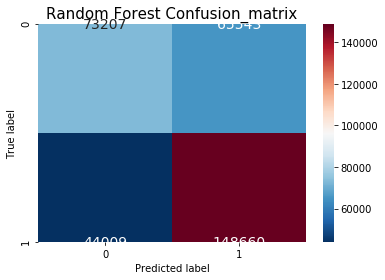

In [12]:
sns.heatmap(confusion_matrix(Y_True, Y_Predictions),annot=True, annot_kws={"size": 14},fmt='3.0f',cmap="RdBu_r")
plt.title('Random Forest Confusion_matrix', y=1.05, size=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')


### Feature Importance

The model was then assessed with regards to its feature importance to produce the following bar plot

Feature ranking:
1. feature 5 (0.172101)
2. feature 2 (0.133080)
3. feature 0 (0.110655)
4. feature 3 (0.109329)
5. feature 1 (0.086868)
6. feature 4 (0.078048)
7. feature 11 (0.069744)
8. feature 6 (0.054895)
9. feature 16 (0.036921)
10. feature 17 (0.034437)
11. feature 10 (0.029666)
12. feature 9 (0.019199)
13. feature 8 (0.016320)
14. feature 13 (0.012939)
15. feature 7 (0.012772)
16. feature 12 (0.008407)
17. feature 14 (0.007870)
18. feature 15 (0.006749)


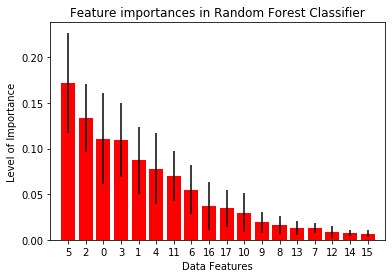

Key: 1 - Attitude:Roll,2 - Attitude: Pitch, 3 - Attitude:Yaw, 4 - Gravity:X, 5 - Gravity:Y, 6 - Gravity:Z, 7 - Rotation_Rate: X, 8 - Rotation_Rate: Y, 9 - Rotation_Rate: Z, 10 - Acceleration: X, 11 - Acceleration: Y, 12 - Acceleration: Z, 11 - Down, 12 - Up, 13 - Walk, 14 - Jog, 15 - Sit, 16 - Stand


In [20]:
importances = Random_Forest.feature_importances_ #identify feature importance
std = np.std([tree.feature_importances_ for tree in Random_Forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
#visualise within a plot
plt.figure()
plt.title("Feature importances in Random Forest Classifier")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.xlabel("Data Features")
plt.ylabel("Level of Importance")
plt.show()

## Using Participent Information

A further experiment was to consider the influence of the participent information in producing a model - the Random Forest was an easier model to apply this to, as it could be produced from smaller amounts of data. 

In [21]:
from sklearn.model_selection import train_test_split
path ="data_subjects_info.csv" #importing the data within a dataframe
Subject_Info = pd.read_csv(path)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(Subject_Info, Subject_Info["gender"], test_size=0.3)

Random_Forest = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=1)
Random_Forest.fit(x_train, y_train)
predictions = Random_Forest.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, predictions))  
print('Precision: %.3f' % precision_score(y_test, predictions))  
print('Recall: %.3f' % recall_score(y_test, predictions)) 
print('F1: %.3f' % f1_score(y_test, predictions))

Accuracy: 1.0
Precision: 1.000
Recall: 1.000
F1: 1.000


This was observed to produce 100% accurate scores - as lovely as this would be, there is a very strong chance that this is formed from the algorithm guessing, and the sample is too small to test this any further.